In [1]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
base_dir = "./cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

In [4]:
train_cats_names = [fname for fname in os.listdir(train_cats_dir)]
print(train_cats_names[:10])

train_dogs_names = [fname for fname in os.listdir(train_dogs_dir)]
print(train_dogs_names[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [5]:
print("Total training dogs images: ", len(os.listdir(train_dogs_dir)))
print("Total training cats images: ", len(os.listdir(train_cats_dir)))
print("Total validation dogs images: ", len(os.listdir(valid_dogs_dir)))
print("Total validation cats images: ", len(os.listdir(valid_cats_dir)))

Total training dogs images:  1000
Total training cats images:  1000
Total validation dogs images:  500
Total validation cats images:  500


In [6]:
nrow = 4
ncol = 4
pic_index = 0

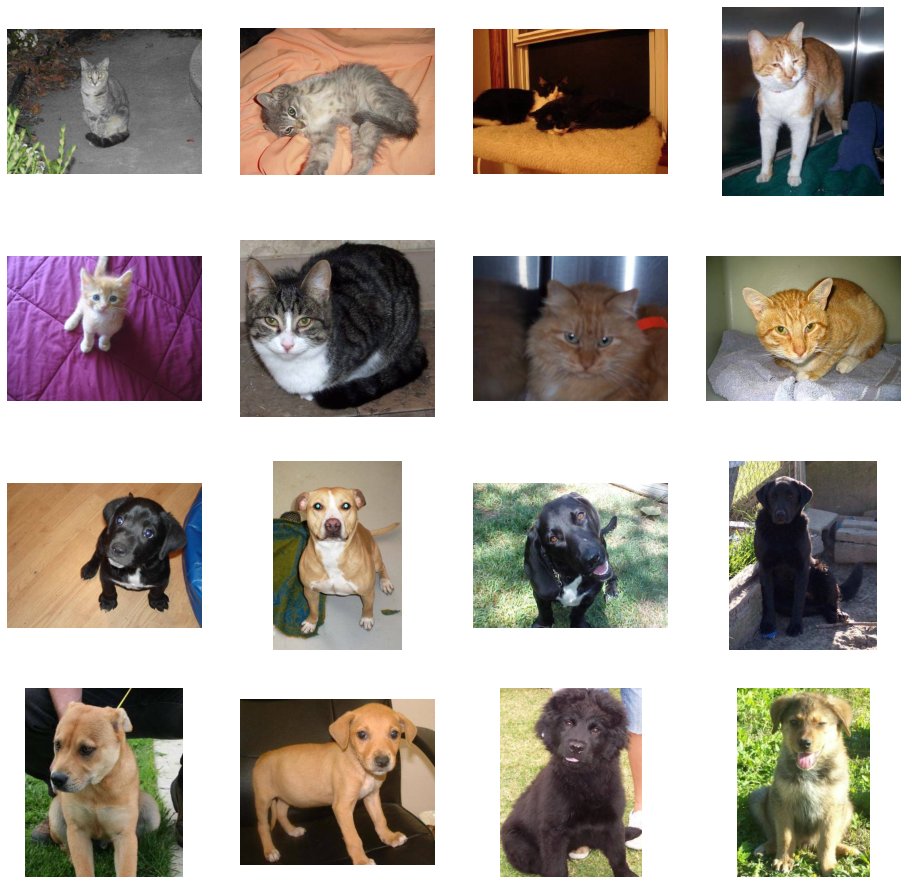

In [11]:
fig = plt.gcf()
fig.set_size_inches(nrow * 4, ncol *4)

pic_index += 8
train_cats_path = [os.path.join(train_cats_dir, fname) for fname in train_cats_names[pic_index-8:pic_index]]
train_dogs_path = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_names[pic_index-8:pic_index]]

for i, path in enumerate(train_cats_path + train_dogs_path):
    f = plt.subplot(nrow, ncol, i + 1)
    f.axis('off')
    img = mpimg.imread(path)
    plt.imshow(img)

plt.show()

In [12]:
import tensorflow as tf
from tensorflow import keras

In [49]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [51]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    batch_size=20, 
    target_size=(150, 150),
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, 
    batch_size=20, 
    target_size=(150, 150),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [53]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=valid_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/15
100/100 - 5s - loss: 0.7898 - acc: 0.5380 - val_loss: 0.6602 - val_acc: 0.6170 - 5s/epoch - 50ms/step
Epoch 2/15
100/100 - 4s - loss: 0.6199 - acc: 0.6585 - val_loss: 0.6112 - val_acc: 0.6660 - 4s/epoch - 40ms/step
Epoch 3/15
100/100 - 4s - loss: 0.5396 - acc: 0.7300 - val_loss: 0.6618 - val_acc: 0.6530 - 4s/epoch - 42ms/step
Epoch 4/15
100/100 - 5s - loss: 0.4711 - acc: 0.7820 - val_loss: 0.5736 - val_acc: 0.7070 - 5s/epoch - 47ms/step
Epoch 5/15
100/100 - 5s - loss: 0.3909 - acc: 0.8230 - val_loss: 0.6001 - val_acc: 0.7230 - 5s/epoch - 45ms/step
Epoch 6/15
100/100 - 4s - loss: 0.3009 - acc: 0.8765 - val_loss: 0.6504 - val_acc: 0.7120 - 4s/epoch - 36ms/step
Epoch 7/15
100/100 - 3s - loss: 0.2051 - acc: 0.9175 - val_loss: 0.9163 - val_acc: 0.7030 - 3s/epoch - 32ms/step
Epoch 8/15
100/100 - 3s - loss: 0.1382 - acc: 0.9490 - val_loss: 1.0239 - val_acc: 0.7150 - 3s/epoch - 32ms/step
Epoch 9/15
100/100 - 3s - loss: 0.0984 - acc: 0.9595 - val_loss: 1.1588 - val_acc: 0.7200 - 3s/e

In [54]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

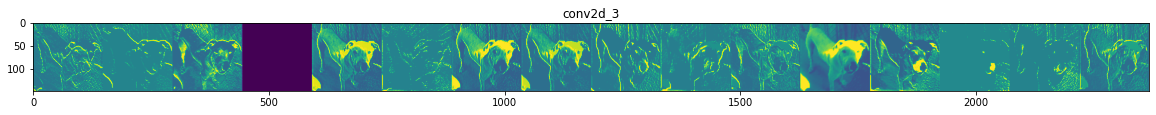

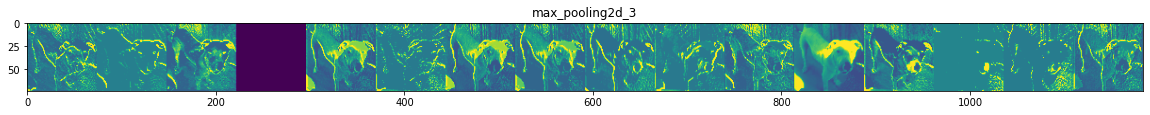

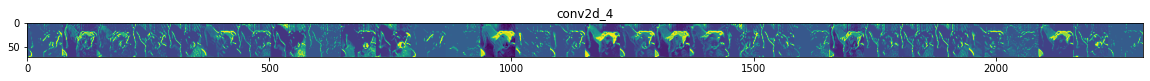

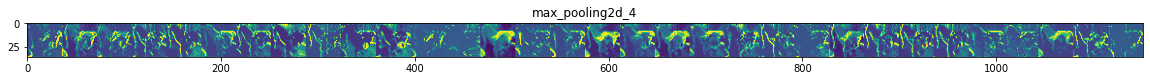

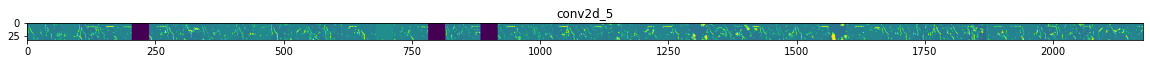

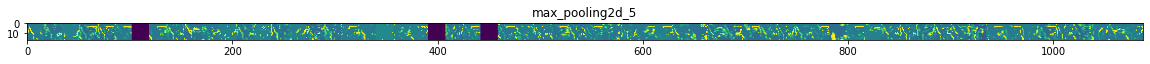

In [55]:
train_cats_path = [os.path.join(train_cats_dir, fname) for fname in train_cats_names]
train_dogs_path = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_names]
img_path = random.choice(train_cats_path + train_dogs_path)
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255.0

successive_outputs = [layer.output for layer in model.layers]
visualization_model = Model(inputs=model.input, outputs=successive_outputs)
layer_names = [layer.name for layer in model.layers]
feature_maps = visualization_model(x)

for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        
        for i in range(n_features):
            f = feature_map[0, :, :, i]
            f -= np.mean(f)
            f /= np.std(f)
            f *= 64
            f += 128
            f = np.clip(f, 0, 255).astype('uint8')
            display_grid[:, i*size:(i+1)*size] = f
        
        fig_size = 20. / n_features
        plt.figure(figsize=(fig_size * n_features, fig_size))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

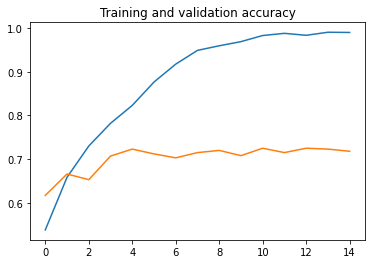

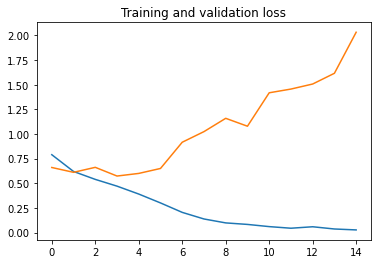

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Training and validation loss")